In [1]:
# Inference by give an image and get text

In [2]:
import torch

from inference.pipeline import Pipe, Task, Model

In [ ]:
# for test in database
import ujson
with open("./datasets/MSRA-TD500/annotations.json", "r") as f:
    annotations = ujson.load(f)
    
def get_path(index, dset='test'):
    index = 10
    path = f"./datasets/MSRA-TD500/{dset}/{annotations[dset][index]['img_name']}"
    return path

In [ ]:
source_image_path = 'test.png'

# Detection

In [4]:
detection = Pipe(Task.detection)

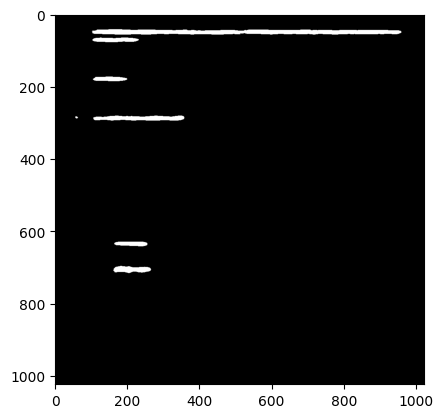

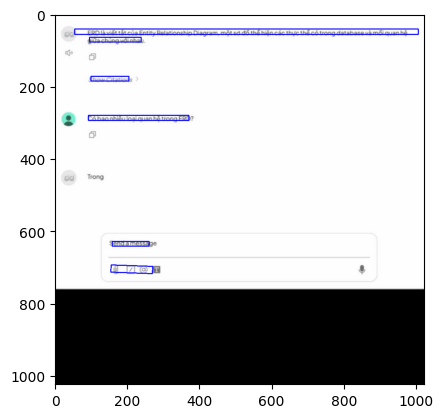

In [ ]:
# model = db_mobilenet_v3_large(pretrained=True)
model = torch.load("checkpoints/detection/model-self.pth", weights_only=False)
# model = db_resnet50(pretrained=True)
results = detection.pipeline(model=model, image_path=source_image_path, polyon=True, show=True, expand_ratio=0.1)

# Recognition

In [6]:
from PIL import Image
from models.recognition.model import OCRModel
from models.recognition.vocab import Vocabulary
from configs.recognition_config import d_model, d_ff, num_heads, num_decoder_layers, dropout
vocab = Vocabulary()

In [7]:
recognition = Pipe(Task.recognition)

reg_model = OCRModel(
    vocab_size=len(vocab),
    d_model = d_model,
    num_heads = num_heads,
    d_ff = d_ff,
    num_decoder_layers = num_decoder_layers,
    dropout = dropout
)

model_name = 'model_weights'
state_dict = torch.load(f'./checkpoints/recognition/{model_name}.pth')
reg_model.load_state_dict(state_dict)

/Users/hung/Desktop/OCR/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/hung/Desktop/OCR/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<All keys matched successfully>

In [10]:
for r in results:
    sub_image = Image.fromarray(r)
    text, _, _ = recognition.pipeline(model=reg_model, image=sub_image, vocab=vocab)
    print(text)
    display(sub_image)

199999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999


199999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999


Bang th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th t


Bang Th Th Th Th Th Th Th Th Th Th Th Th Th Th Th Th Th Th Th Th Th Th Th Th Th Th Th Th Th Th Th T


Bang th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th th t


190000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


# Visualization

In [ ]:
visualize = Pipe(Task.visualize)

In [12]:
image = sub_image

generated:  190000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


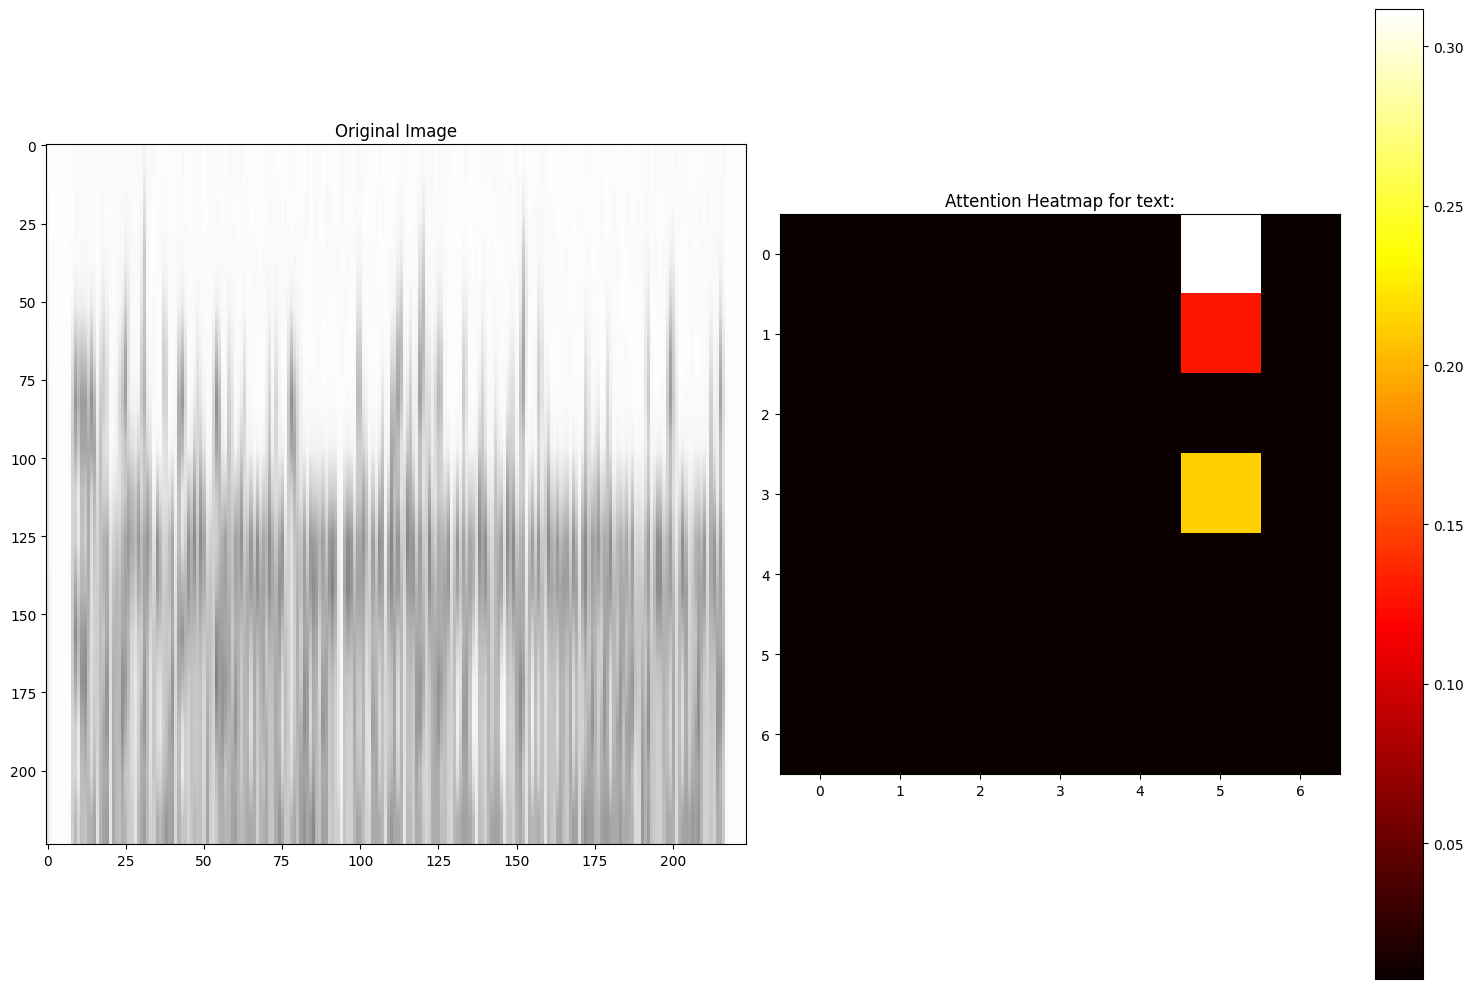

In [13]:
display(image)
_ = visualize.pipeline(model=reg_model, image=image, vocab=vocab)